In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType


In [2]:
# Khởi tạo một phiên Spark trên Google Colab
spark = SparkSession.builder \
    .appName("PySpark on Google Colab") \
    .getOrCreate()

In [3]:
# Định nghĩa lược đồ
schema = StructType([
    StructField("surname", StringType(), True),
    StructField("team", StringType(), True),
    StructField("position", StringType(), True),
    StructField("minutes", IntegerType(), True),
    StructField("shots", IntegerType(), True),
    StructField("passes", IntegerType(), True),
    StructField("tackles", IntegerType(), True),
    StructField("saves", IntegerType(), True)
])

In [4]:
# Tạo DataFrame từ dữ liệu và lược đồ
df = spark.read.csv("Players.csv", header=True, schema=schema)
# Hiển thị dữ liệu của DataFrame
df.show(10)

+---------+-------+----------+-------+-----+------+-------+-----+
|  surname|   team|  position|minutes|shots|passes|tackles|saves|
+---------+-------+----------+-------+-----+------+-------+-----+
|   Abdoun|Algeria|midfielder|     16|    0|     6|      0|    0|
|   Abdoun|Algeria|midfielder|     16|    0|     6|      0|    0|
|  Belhadj|Algeria|  defender|    270|    1|   146|      8| NULL|
|Boudebouz|Algeria|midfielder|     74|    3|    28|      1| NULL|
|Bougherra|Algeria|  defender|    270|    1|    89|     11|    0|
| Chaouchi|Algeria|goalkeeper|     90|    0|    17|      0|    2|
| Djebbour|Algeria|   forward|    123|    3|    19|      1|    0|
|  Ghezzal|Algeria|   forward|     40|    3|     8|      0|    0|
|Guedioura|Algeria|midfielder|     38|    0|    18|      1|    0|
| Halliche|Algeria|  defender|    270|    2|    94|      4|    0|
+---------+-------+----------+-------+-----+------+-------+-----+
only showing top 10 rows



In [5]:
# Tính toán thống kê tóm tắt của các cột số
df.describe().show()

+-------+----------+-------+----------+------------------+------------------+-----------------+-----------------+------------------+
|summary|   surname|   team|  position|           minutes|             shots|           passes|          tackles|             saves|
+-------+----------+-------+----------+------------------+------------------+-----------------+-----------------+------------------+
|  count|       596|    596|       596|               596|               596|              596|              596|               594|
|   mean|      NULL|   NULL|      NULL|208.54026845637583|2.3003355704697985|84.38926174496645|4.184563758389261|0.6683501683501684|
| stddev|      NULL|   NULL|      NULL| 145.5258793789045| 3.345946985793561|77.31230664289909|4.653307847866984| 2.958300690142359|
|    min|    Abdoun|Algeria|  defender|                 1|                 0|                0|                0|                 0|
|    max|von Bergen|Uruguay|midfielder|               570|           

In [6]:
# Lấy danh sách tên cột
column_list = df.columns
print(column_list)

['surname', 'team', 'position', 'minutes', 'shots', 'passes', 'tackles', 'saves']


In [7]:
# Đếm số lượng hàng trong dữ liệu
row_count = df.count()
print("Số lượng hàng trong dữ liệu:", row_count)

Số lượng hàng trong dữ liệu: 596


In [8]:
# Sử dụng phương thức filter() để lọc dữ liệu lấy các cầu thủ có vị trí là midfielde
filtered_df = df.filter(df.position == 'midfielder')
filtered_df.show(10)

+---------+-------+----------+-------+-----+------+-------+-----+
|  surname|   team|  position|minutes|shots|passes|tackles|saves|
+---------+-------+----------+-------+-----+------+-------+-----+
|   Abdoun|Algeria|midfielder|     16|    0|     6|      0|    0|
|   Abdoun|Algeria|midfielder|     16|    0|     6|      0|    0|
|Boudebouz|Algeria|midfielder|     74|    3|    28|      1| NULL|
|Guedioura|Algeria|midfielder|     38|    0|    18|      1|    0|
|    Kadir|Algeria|midfielder|    262|    0|   104|      3|    0|
|    Lacen|Algeria|midfielder|    270|    0|   158|      8|    0|
|  Matmour|Algeria|midfielder|    255|    3|    68|      3|    0|
|   Mesbah|Algeria|midfielder|      1|    0|     1|      0|    0|
|    Yebda|Algeria|midfielder|    269|    8|   138|     10|    0|
|    Ziani|Algeria|midfielder|    240|    5|    93|      6|    0|
+---------+-------+----------+-------+-----+------+-------+-----+
only showing top 10 rows



In [9]:
# Sử dụng phương thức groupBy() để nhóm dữ liệu và tính tổng số phút chơi của từng vị trí
grouped_df = df.groupBy('position').sum('minutes')
grouped_df.show()

+----------+------------+
|  position|sum(minutes)|
+----------+------------+
|goalkeeper|       11337|
|   forward|       23838|
|  defender|       45423|
|midfielder|       43692|
+----------+------------+



In [10]:
# Lọc các cầu thủ có số phút chơi nằm trong khoảng từ 100 đến 200
filtered_df = df.filter(df.minutes.between(100, 200))
filtered_df.show(10)

+------------+---------+----------+-------+-----+------+-------+-----+
|     surname|     team|  position|minutes|shots|passes|tackles|saves|
+------------+---------+----------+-------+-----+------+-------+-----+
|    Djebbour|  Algeria|   forward|    123|    3|    19|      1|    0|
|     M'Bolhi|  Algeria|goalkeeper|    180|    0|    30|      0|   12|
|      Aguero|Argentina|   forward|    106|    2|    57|      2|    0|
|   Gutierrez|Argentina|midfielder|    191|    0|    83|     11|    0|
|      Samuel|Argentina|  defender|    114|    2|    43|      1|    0|
|       Veron|Argentina|midfielder|    185|    3|   235|     10|    0|
|   Bresciano|Australia|midfielder|    132|    3|    47|      1|    0|
|      Cahill|Australia|midfielder|    146|    6|    39|      1|    0|
|      Carney|Australia|  defender|    180|    0|    56|      4|    0|
|Chipperfield|Australia|midfielder|    138|    2|    50|      3|    0|
+------------+---------+----------+-------+-----+------+-------+-----+
only s

In [11]:
# Lọc các cầu thủ có tên bắt đầu bằng "A"
filtered_df = df.filter(df.surname.rlike("^A"))
filtered_df.show(10)

+--------------+---------+----------+-------+-----+------+-------+-----+
|       surname|     team|  position|minutes|shots|passes|tackles|saves|
+--------------+---------+----------+-------+-----+------+-------+-----+
|        Abdoun|  Algeria|midfielder|     16|    0|     6|      0|    0|
|        Abdoun|  Algeria|midfielder|     16|    0|     6|      0|    0|
|        Aguero|Argentina|   forward|    106|    2|    57|      2|    0|
|     Aboubakar| Cameroon|   forward|     46|    2|    16|      0|    0|
|Alexandre Song| Cameroon|midfielder|     90|    1|    59|      7|    0|
|  Assou-Ekotto| Cameroon|  defender|    270|    0|   116|      5|    0|
|         Agger|  Denmark|  defender|    270|    2|   120|     10|    0|
|   Ashley Cole|  England|  defender|    360|    0|   142|     12|    0|
|        Abidal|   France|  defender|    180|    0|    91|      6|    0|
|    Abou Diaby|   France|midfielder|    270|    1|   111|      5|    0|
+--------------+---------+----------+-------+-----+

In [13]:
# Tạo một cột mới "high_shots" để chỉ định liệu số lần sút của cầu thủ có lớn hơn 3 không
from pyspark.sql.functions import when

df1 = df.withColumn("high_shots", when(df.shots > 3, 1).otherwise(0))
df1.show(10)

+---------+-------+----------+-------+-----+------+-------+-----+----------+
|  surname|   team|  position|minutes|shots|passes|tackles|saves|high_shots|
+---------+-------+----------+-------+-----+------+-------+-----+----------+
|   Abdoun|Algeria|midfielder|     16|    0|     6|      0|    0|         0|
|   Abdoun|Algeria|midfielder|     16|    0|     6|      0|    0|         0|
|  Belhadj|Algeria|  defender|    270|    1|   146|      8| NULL|         0|
|Boudebouz|Algeria|midfielder|     74|    3|    28|      1| NULL|         0|
|Bougherra|Algeria|  defender|    270|    1|    89|     11|    0|         0|
| Chaouchi|Algeria|goalkeeper|     90|    0|    17|      0|    2|         0|
| Djebbour|Algeria|   forward|    123|    3|    19|      1|    0|         0|
|  Ghezzal|Algeria|   forward|     40|    3|     8|      0|    0|         0|
|Guedioura|Algeria|midfielder|     38|    0|    18|      1|    0|         0|
| Halliche|Algeria|  defender|    270|    2|    94|      4|    0|         0|

In [43]:
from pyspark.sql.functions import col
#Kết hợp nhiều điều kiện 
filtered_df = df.filter((df.minutes.between(100, 500)) & (df.shots >= 3) & df.surname.rlike("^A")) \
                 .select(col("surname"), col("team"), col("minutes"), col("shots")) \
                 .orderBy(col("shots").desc())

filtered_df.show(10)

+--------------+--------+-------+-----+
|       surname|    team|minutes|shots|
+--------------+--------+-------+-----+
|       Asamoah|   Ghana|    480|   11|
|        Anelka|  France|    117|    7|
|Alvaro Pereira| Uruguay|    409|    6|
|       Almeida|Portugal|    136|    5|
|          Ayew|   Ghana|    389|    3|
+--------------+--------+-------+-----+



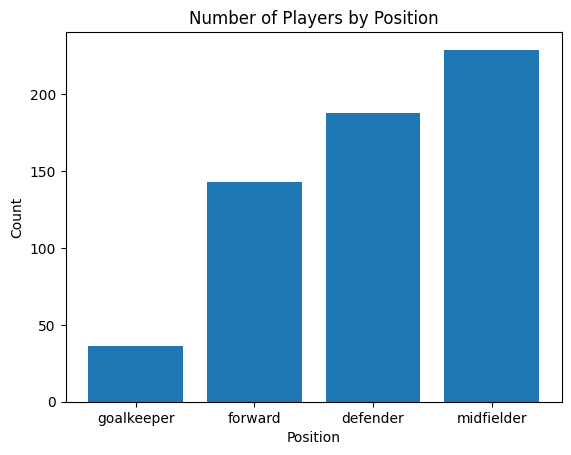

In [14]:
import matplotlib.pyplot as plt

# Đếm số lượng cầu thủ theo vị trí
position_counts = df.groupBy('position').count().collect()

positions = [row['position'] for row in position_counts]
counts = [row['count'] for row in position_counts]

plt.bar(positions, counts)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Number of Players by Position')
plt.show()

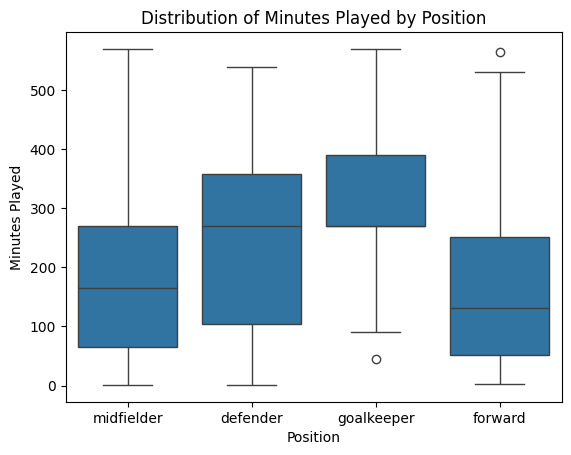

In [50]:
import seaborn as sns

# Tạo biểu đồ hộp cho phân phối thời gian thi đấu
sns.boxplot(x='position', y='minutes', data=df.toPandas())
plt.xlabel('Position')
plt.ylabel('Minutes Played')
plt.title('Distribution of Minutes Played by Position')
plt.show()

In [15]:
spark.stop()